# [【SOTA】マイナビ × SIGNATE Student Cup 2019: 賃貸物件の家賃予測](https://signate.jp/competitions/264)

## 1. データ読み込み

In [410]:
import pandas as pd
import numpy as np
import pathlib
import os

# 学習データ、テストデータの読み込み
train_path = pathlib.Path("./DATA/train.csv")
test_path = pathlib.Path("./DATA/test.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [411]:
train_data.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


## 2. 前処理

### 2.1. データ選択

In [412]:
train_data_1 = train_data[["id", "アクセス", "所在地", "賃料", "間取り", "築年数", "面積", "所在階", "建物構造"]]
test_data_1 = test_data[["id", "アクセス", "所在地", "間取り", "築年数", "面積", "所在階", "建物構造"]]

### 2.2. 間取りの数値化

In [413]:
# 間取りにlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["間取り"],test_data_1["間取り"]]))

train_data_1["間取りID"] = le.transform(train_data_1["間取り"])
test_data_1["間取りID"] = le.transform(test_data_1["間取り"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2.3. 面積の数値化

In [414]:
# 面積のカラムタイトルを面積[m2]に置換
train_data_1 = train_data_1.rename(columns={"面積": "面積m2"})
test_data_1 = test_data_1.rename(columns={"面積": "面積m2"})

In [415]:
# カラムタイトル面積[m2]の要素からm2を削除
train_data_1['面積m2'] = train_data_1['面積m2'].str.replace('m2', '').astype(float)
test_data_1['面積m2'] = test_data_1['面積m2'].str.replace('m2', '').astype(float)

### 2.4. 所在階の数値化

In [416]:
# 所在階の中身を"／"で2つの列に分割
train_data_1 = pd.concat([train_data_1, train_data_1['所在階'].str.split('／', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['所在階'].str.split('／', expand=True)], axis=1)

In [417]:
# 分割した所在階のカラム名変更　0:所在、1:階層
train_data_1 = train_data_1.rename(columns={0:"所在", 1:"階層"})
test_data_1 = test_data_1.rename(columns={0:"所在", 1:"階層"})

In [418]:
# 所在と階層の要素を整形
train_data_1['所在'] = train_data_1['所在'].str.replace('階', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('建', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('地下', '-')
train_data_1['所在'] = train_data_1['所在'].str.replace('\（.*\）', '', regex=True)
train_data_1['階層'] = train_data_1['階層'].str.replace('階建', '')
train_data_1['階層'] = train_data_1['階層'].str.replace('\（.*\）', '', regex=True)
train_data_1['所在'] = train_data_1['所在'].replace('', np.nan)

test_data_1['所在'] = test_data_1['所在'].str.replace('階', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('建', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('地下', '-')
test_data_1['所在'] = test_data_1['所在'].str.replace('\（.*\）', '', regex=True)
test_data_1['階層'] = test_data_1['階層'].str.replace('階建', '')
test_data_1['階層'] = test_data_1['階層'].str.replace('\（.*\）', '', regex=True)
test_data_1['所在'] = test_data_1['所在'].replace('', np.nan)

In [419]:
# # "階層"がNoneの箇所を"所在"の値で埋める
# train_data_1['階層'].fillna(train_data_1['所在'], inplace=True)
# test_data_1['階層'].fillna(test_data_1['所在'], inplace=True)

In [420]:
# 所在と階層の要素をfloat型に変換する
train_data_1['所在'] = train_data_1['所在'].astype(float)
train_data_1['階層'] = train_data_1['階層'].astype(float)

test_data_1['所在'] = test_data_1['所在'].astype(float)
test_data_1['階層'] = test_data_1['階層'].astype(float)

In [421]:
# 所在階のカラムを削除
train_data_1 = train_data_1.drop('所在階', axis=1)
test_data_1 = test_data_1.drop('所在階', axis=1)

In [422]:
# # 所在も階層も空欄のデータは間取りと面積の近いデータで埋める
# print(test_data_1[(test_data_1["間取りID"] == 21) & (test_data_1["面積m2"] > 90) & (test_data_1["面積m2"] < 95)].mean())
# test_data_1.loc[test_data_1["id"]==40675, "所在"] = float(6)
# test_data_1.loc[test_data_1["id"]==40675, "階層"] = float(9)

### 2.5. 築年数の数値化

In [423]:
# 新築の場合は全て0にする
train_data_1.loc[train_data_1["築年数"]=="新築", "築年数"] = float(0)
test_data_1.loc[test_data_1["築年数"]=="新築", "築年数"] = float(0)

In [424]:
# 築年数を数値に変換する
train_data_1 = pd.concat([train_data_1, train_data_1['築年数'].str.split('年', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['築年数'].str.split('年', expand=True)], axis=1)

In [425]:
# ヶ月を消す
train_data_1[1] = train_data_1[1].str.replace('ヶ月', '')
test_data_1[1] = test_data_1[1].str.replace('ヶ月', '')

In [426]:
# 築年数をfloat変換
train_data_1["築年数"] = train_data_1[0].astype(float) + (train_data_1[1].astype(float) / float(10))
test_data_1["築年数"] = test_data_1[0].astype(float) + (test_data_1[1].astype(float) / float(10))

In [427]:
test_data_1.head()

,id,アクセス,所在地,間取り,築年数,面積m2,建物構造,間取りID,所在,階層,0,1
0,31471,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,東京都世田谷区深沢５丁目1-27,2LDK,49.0,50.22,鉄骨造,14,8.0,8.0,49,0
1,31472,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,東京都目黒区八雲１丁目11-8,1R,0.2,20.88,RC（鉄筋コンクリート）,9,3.0,4.0,0,2
2,31473,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,東京都豊島区池袋本町２丁目22-2,1K,23.4,26.93,鉄骨造,3,1.0,4.0,23,4
3,31474,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,東京都杉並区和泉１丁目,1K,36.2,23.57,木造,3,1.0,2.0,36,2
4,31475,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,東京都杉並区堀ノ内２丁目,2LDK,45.4,50.00,RC（鉄筋コンクリート）,14,4.0,4.0,45,4


In [428]:
print(test_data_1[test_data_1["築年数"].isnull()])

          id                                               アクセス  \
77     31548  東急多摩川線\t矢口渡駅\t徒歩7分\t\t京浜東北線\t蒲田駅\t徒歩20分\t\t東急池...   
108    31579  東急田園都市線\t三軒茶屋駅\t徒歩8分\t\t東急世田谷線\t三軒茶屋駅\t徒歩9分\t\...   
112    31583  日比谷線\t仲御徒町駅\t徒歩6分\t\t山手線\t秋葉原駅\t徒歩9分\t\t山手線\t御...   
156    31627  京急本線\t大森海岸駅\t徒歩8分\t\t京浜東北線\t大森(東京都)駅\t徒歩11分\t\...   
162    31633  半蔵門線\t住吉(東京都)駅\t徒歩7分\t\t都営新宿線\t西大島駅\t徒歩23分\t\t...   
...      ...                                                ...   
31141  62612  小田急小田原線\t千歳船橋駅\t徒歩15分\t\t小田急小田原線\t祖師ケ谷大蔵駅\t徒歩1...   
31176  62647  東西線\t葛西駅\t徒歩10分\t\t東西線\t西葛西駅\t徒歩23分\t\t京葉線(東京－...   
31181  62652  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   
31182  62653  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   
31212  62683  都営大江戸線\t牛込柳町駅\t徒歩5分\t\t都営大江戸線\t若松河田駅\t徒歩6分\t\t...   

                    所在地       間取り  築年数   面積m2          建物構造  間取りID   所在    階層  \
77         東京都大田区東矢口２丁目  1K+S(納戸)  NaN  23.80           鉄骨造      4  2.0   3.0   
108    東京都世田谷区上馬２丁目26-8        1K

In [429]:
# 0と1の列を消す
train_data_1 = train_data_1.drop(0, axis=1)
train_data_1 = train_data_1.drop(1, axis=1)

test_data_1 = test_data_1.drop(0, axis=1)
test_data_1 = test_data_1.drop(1, axis=1)

### 2.6. 緯度経度情報の追加

#### [このサイト](https://ktgis.net/gcode/geocoding.html)を利用する

In [430]:
# IDと住所をファイル出力
train_coordinate = train_data[["id", "所在地"]]
test_coordinate = test_data[["id", "所在地"]]

train_coordinate.to_csv("train_coordinate.csv", header=False, index=False)
test_coordinate.to_csv("test_coordinate.csv", header=False, index=False)

In [431]:
# 緯度、経度情報の読み込み(id, 所在地, 経度, 緯度)
train_coordinate_addvalue = pd.read_excel("train_coordinate_addvalue.xlsx")
test_coordinate_addvalue = pd.read_excel("test_coordinate_addvalue.xlsx")

In [432]:
train_data_1 = pd.merge(train_data_1, train_coordinate_addvalue[["id", "経度", "緯度"]], on='id')
test_data_1 = pd.merge(test_data_1, test_coordinate_addvalue[["id", "経度", "緯度"]], on='id')

### 2.7. 部屋数の追加

In [433]:
# 部屋数のマージ
number_of_rooms = pd.read_excel("number_of_rooms.xlsx")
train_data_1 = pd.merge(train_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')
test_data_1 = pd.merge(test_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')

In [434]:
# インデックスの振り直し
train_data_1 = train_data_1.sort_values("id")
train_data_1 = train_data_1.reset_index(drop=True)

test_data_1 = test_data_1.sort_values("id")
test_data_1 = test_data_1.reset_index(drop=True)

### 2.8. 1部屋当たりの面積追加

In [435]:
# 面積と部屋数から1部屋当たりの面積を算出
train_data_1["1部屋当たり面積m2"] = (train_data_1["面積m2"] / train_data_1["部屋数"]).astype(float)
test_data_1["1部屋当たり面積m2"] = (test_data_1["面積m2"] / test_data_1["部屋数"]).astype(float)

In [436]:
# 間取りと間取りIDは削除する
train_data_1 = train_data_1.drop('間取り', axis=1)
test_data_1 = test_data_1.drop('間取り', axis=1)

# train_data_1 = train_data_1.drop('間取りID', axis=1)
# test_data_1 = test_data_1.drop('間取りID', axis=1)

#### 2.9. 建物の高さ率を追加(高さ率=所在/階層)

In [437]:
# 高さ率の算出
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.10. 建物構造の数値化

In [438]:
train_data_1["建物構造"].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: 建物構造, dtype: int64

In [439]:
# 建物構造にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["建物構造"],test_data_1["建物構造"]]))

train_data_1["建物構造ID"] = le.transform(train_data_1["建物構造"])
test_data_1["建物構造ID"] = le.transform(test_data_1["建物構造"])

In [440]:
# 不要になった建物構造カラムを削除する
train_data_1 = train_data_1.drop('建物構造', axis=1)
test_data_1 = test_data_1.drop('建物構造', axis=1)

### 2.11. 新規カラムに「賃料/面積」を追加

In [441]:
train_data_1["賃料/面積"] = train_data_1["賃料"] / train_data_1["面積m2"]

### 2.12. 東京23区の地域ごとに、住宅地の平均地価情報を追加

In [442]:
# 区の情報の確認(23区だけだった)
# sample = train_data["所在地"].str.extract("東京都(.+区)", expand=True)
# sample.value_counts()

In [443]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [444]:
# 訓練データとテストデータに、エリア情報を追加
train_data_1["エリア"] = ""
test_data_1["エリア"] = ""
train_data_1["エリア"] = train_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)
test_data_1["エリア"] = test_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)

In [445]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [446]:
# 一部エリア情報に数値が残ってしまうので、消す
train_data_1["エリア"] = train_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("一丁目", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("-", "")

test_data_1["エリア"] = test_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("一丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("二丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("四丁目", "")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [447]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [448]:
# 坪単価情報の読込～結合
wards_value = pd.read_excel("23区_地域毎_坪単価.xlsx")
train_data_1 = pd.merge(train_data_1, wards_value, on="エリア", how="left")
test_data_1 = pd.merge(test_data_1, wards_value, on="エリア", how="left")
train_data_1 = train_data_1.sort_values("id")
test_data_1 = test_data_1.sort_values("id")

train_data_1 = train_data_1.drop("Unnamed: 4", axis=1)
test_data_1 = test_data_1.drop("Unnamed: 4", axis=1)

In [449]:
# 地価の抜けデータを平均値で補間
# 江東区
train_data_1.loc[train_data_1["id"]==2767, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==7559, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==2767, "平均坪単価（万円）"] = 206.6
train_data_1.loc[train_data_1["id"]==7559, "平均坪単価（万円）"] = 206.6
# 港区
train_data_1.loc[train_data_1["id"]==17654, "区"] = "港区"
train_data_1.loc[train_data_1["id"]==17654, "平均坪単価（万円）"] = 1321.4

In [450]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [451]:
print(train_data_1[train_data_1["平均坪単価（万円）"].isnull()])
print(test_data_1[test_data_1["平均坪単価（万円）"].isnull()])

Empty DataFrame
Columns: [id, アクセス, 所在地, 賃料, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, 賃料/面積, エリア, 区, 地名, 平均坪単価（万円）]
Index: []
Empty DataFrame
Columns: [id, アクセス, 所在地, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, エリア, 区, 地名, 平均坪単価（万円）]
Index: []


### 2.13. 六本木駅からの距離情報を追加

In [452]:
# 六本木駅からの距離を追加
# 六本木駅 緯度: 35.662725 経度: 139.731217
from geopy import Point
from geopy.distance import geodesic
from geopy.distance import distance

train_data_1["Roppongi_longtitude"] = 139.731217
train_data_1["Roppongi_latitude"] = 35.662725
train_data_1['point'] = train_data_1.apply(lambda row: Point(latitude=row['緯度'], longitude=row['経度']), axis=1)
train_data_1['point_next'] = train_data_1.apply(lambda row: Point(latitude=row['Roppongi_latitude'], longitude=row['Roppongi_longtitude']), axis=1)

test_data_1["Roppongi_longtitude"] = 139.731217
test_data_1["Roppongi_latitude"] = 35.662725
test_data_1['point'] = test_data_1.apply(lambda row: Point(latitude=row['緯度'], longitude=row['経度']), axis=1)
test_data_1['point_next'] = test_data_1.apply(lambda row: Point(latitude=row['Roppongi_latitude'], longitude=row['Roppongi_longtitude']), axis=1)

train_data_1['distance_km'] = train_data_1.apply(lambda row: distance(row['point'], row['point_next']).km if row['point_next'] is not None else float('nan'), axis=1)
test_data_1['distance_km'] = test_data_1.apply(lambda row: distance(row['point'], row['point_next']).km if row['point_next'] is not None else float('nan'), axis=1)

# 距離値を逆数にする　Reciprocal
train_data_1["Recciprocal_distance_km"] = (1 / train_data_1["distance_km"]).astype(float)
test_data_1["Recciprocal_distance_km"] = (1 / test_data_1["distance_km"]).astype(float)

In [453]:
# 不要なカラムを削除する
train_data_1 = train_data_1.drop(["Roppongi_longtitude", "Roppongi_latitude", "point", "point_next", "distance_km"], axis=1)
test_data_1 = test_data_1.drop(["Roppongi_longtitude", "Roppongi_latitude", "point", "point_next", "distance_km"], axis=1)

In [455]:
train_data_1

,id,アクセス,所在地,賃料,築年数,面積m2,間取りID,所在,階層,経度,...,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,エリア,区,地名,平均坪単価（万円）,Recciprocal_distance_km
0,1,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,東京都北区滝野川３丁目,75000,9.9,20.01,3,1.0,12.0,139.727873,...,1.0,20.010000,0.083333,3,3748.125937,北区滝野川,北区,滝野川,180.0,0.105936
1,2,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,東京都中央区月島３丁目,76000,45.0,16.50,9,5.0,10.0,139.780485,...,1.0,16.500000,0.500000,10,4606.060606,中央区月島,中央区,月島,323.0,0.224156
2,3,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,東京都渋谷区笹塚２丁目,110000,8.6,22.05,3,12.0,15.0,139.667375,...,1.0,22.050000,0.800000,3,4988.662132,渋谷区笹塚,渋谷区,笹塚,324.0,0.168132
3,4,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,東京都杉並区高円寺南２丁目23-2,150000,29.4,60.48,14,3.0,4.0,139.648495,...,3.5,17.280000,0.750000,3,2480.158730,杉並区高円寺南,杉並区,高円寺南,253.0,0.116755
4,5,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,東京都葛飾区金町３丁目7-2,74000,31.7,39.66,10,1.0,2.0,139.872315,...,3.0,13.220000,0.500000,7,1865.859808,葛飾区金町,葛飾区,金町,111.0,0.058186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31465,31466,都営三田線\t蓮根駅\t徒歩7分\t\t都営三田線\t西台駅\t徒歩10分\t\t都営三田線...,東京都板橋区蓮根２丁目,80000,30.0,37.90,10,1.0,3.0,139.676028,...,3.0,12.633333,0.333333,10,2110.817942,板橋区蓮根,板橋区,蓮根,124.0,0.070131
31466,31467,東急田園都市線\t三軒茶屋駅\t徒歩6分\t\t東急世田谷線\t西太子堂駅\t徒歩4分\t\...,東京都世田谷区太子堂５丁目17-1,54500,39.7,12.04,9,4.0,4.0,139.668168,...,1.0,12.040000,1.000000,3,4526.578073,世田谷区太子堂,世田谷区,太子堂,222.0,0.168642
31467,31468,東西線\t南砂町駅\t徒歩5分\t\t都営新宿線\t大島(東京都)駅\t徒歩26分\t\t東...,東京都江東区南砂４丁目,125000,46.0,60.00,17,3.0,5.0,139.831058,...,4.0,15.000000,0.600000,10,2083.333333,江東区南砂,江東区,南砂,145.0,0.109797
31468,31469,中央線（快速）\t中野(東京都)駅\t徒歩4分\t\t丸ノ内線(池袋－荻窪)\t新中野駅\t...,東京都中野区中野２丁目,98000,11.0,29.59,1,1.0,2.0,139.669216,...,2.0,14.795000,0.500000,7,3311.929706,中野区中野,中野区,中野,261.0,0.139412


### 2.14. 欠損値を区の平均値で埋める

In [456]:
train_data_1["築年数"] = train_data_1.groupby('区')["築年数"].transform(lambda x:x.fillna(x.mean()))
train_data_1["所在"] = train_data_1.groupby('区')["所在"].transform(lambda x:x.fillna(x.mean()))
train_data_1["階層"] = train_data_1.groupby('区')["階層"].transform(lambda x:x.fillna(x.mean()))

test_data_1["築年数"] = test_data_1.groupby('区')["築年数"].transform(lambda x:x.fillna(x.mean()))
test_data_1["所在"] = test_data_1.groupby('区')["所在"].transform(lambda x:x.fillna(x.mean()))
test_data_1["階層"] = test_data_1.groupby('区')["階層"].transform(lambda x:x.fillna(x.mean()))

In [361]:
# 高さ率の更新
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.15. 最寄りの路線ID、駅IDと、そこからの徒歩分数を追加

In [362]:
# 徒歩分数の整理のために初回のみ出力
# test_data_1["路線情報"] = test_data_1["アクセス"].str.extract("(\d{1,2}分)", expand=True)
# train_data_1 = pd.concat([train_data_1, train_data_1['アク6セス'].str.split('\t', expand=True)], axis=1).drop('アクセス', axis=1)
# test_data_1 = pd.concat([test_data_1, test_data_1['アクセス'].str.split('\t', expand=True)], axis=1).drop('アクセス', axis=1)

# train_access_1 = train_data_1[[0, 1, 2]]
# train_access_2 = train_data_1[[4, 5, 6]]
# train_access_3 = train_data_1[[8, 9, 10]]

# test_access_1 = test_data_1[[0, 1, 2]]
# test_access_2 = test_data_1[[4, 5, 6]]
# test_access_3 = test_data_1[[8, 9, 10]]

# train_access_1.to_excel("train_access_1.xlsx", header=True, index=False)
# train_access_2.to_excel("train_access_2.xlsx", header=True, index=False)
# train_access_3.to_excel("train_access_3.xlsx", header=True, index=False)

# test_access_1.to_excel("test_access_1.xlsx", header=True, index=False)
# test_access_2.to_excel("test_access_2.xlsx", header=True, index=False)
# test_access_3.to_excel("test_access_3.xlsx", header=True, index=False)

In [363]:
# 最寄り駅データの読み込み
train_access_result = pd.read_excel("./アクセス/train_access_result.xlsx")
test_access_result = pd.read_excel("./アクセス/test_access_result.xlsx")

# データ結合
train_data_1 = pd.concat([train_data_1, train_access_result], axis=1)
test_data_1 = pd.concat([test_data_1, test_access_result], axis=1)

# 徒歩分数とfloat型に変換する
train_data_1["徒歩分数"] = (train_data_1["徒歩分数"]).astype(float)
test_data_1["徒歩分数"] = (test_data_1["徒歩分数"]).astype(float)

In [364]:
# # 路線名にlabel encodingを適用
# le = LabelEncoder()
# le.fit(pd.concat([train_data_1["路線名"],test_data_1["路線名"]]))

# train_data_1["路線ID"] = le.transform(train_data_1["路線名"])
# test_data_1["路線ID"] = le.transform(test_data_1["路線名"])

In [365]:
# # 駅名にlabel encodingを適用
# le = LabelEncoder()
# le.fit(pd.concat([train_data_1["駅名"],test_data_1["駅名"]]))

# train_data_1["駅ID"] = le.transform(train_data_1["駅名"])
# test_data_1["駅ID"] = le.transform(test_data_1["駅名"])

### 2.16. 区IDと区ごとの統計情報の追加

In [366]:
# 区にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["区"],test_data_1["区"]]))

train_data_1["区ID"] = le.transform(train_data_1["区"])
test_data_1["区ID"] = le.transform(test_data_1["区"])

In [367]:
# 区ごとの統計情報の追加
# 例）新宿区のとある物件の築年数の統計値：(【1】-【2】)*【1】/【2】
# 【1】該当物件の築年数、【2】新宿区の物件の平均築年数

def relative_distribution(self, target, value): 
    new_column = value + "@" + target
    self[new_column] = self.groupby(target)[value].transform("mean").copy()
    self[new_column] = (self[value] - self[new_column]) * self[value] / self[new_column]

relative_distribution(train_data_1, "区ID", "築年数")
relative_distribution(train_data_1, "区ID", "面積m2")
relative_distribution(train_data_1, "区ID", "所在")
relative_distribution(train_data_1, "区ID", "階層")
relative_distribution(train_data_1, "区ID", "部屋数")
relative_distribution(train_data_1, "区ID", "1部屋当たり面積m2")
relative_distribution(train_data_1, "区ID", "平均坪単価（万円）")
relative_distribution(train_data_1, "区ID", "Recciprocal_distance_km")
relative_distribution(train_data_1, "区ID", "徒歩分数")

relative_distribution(train_data_1, "間取りID", "築年数")
relative_distribution(train_data_1, "間取りID", "面積m2")
relative_distribution(train_data_1, "間取りID", "所在")
relative_distribution(train_data_1, "間取りID", "階層")
relative_distribution(train_data_1, "間取りID", "部屋数")
relative_distribution(train_data_1, "間取りID", "1部屋当たり面積m2")
relative_distribution(train_data_1, "間取りID", "平均坪単価（万円）")
relative_distribution(train_data_1, "間取りID", "Recciprocal_distance_km")
relative_distribution(train_data_1, "間取りID", "徒歩分数")

relative_distribution(train_data_1, "建物構造ID", "築年数")
relative_distribution(train_data_1, "建物構造ID", "面積m2")
relative_distribution(train_data_1, "建物構造ID", "所在")
relative_distribution(train_data_1, "建物構造ID", "階層")
relative_distribution(train_data_1, "建物構造ID", "部屋数")
relative_distribution(train_data_1, "建物構造ID", "1部屋当たり面積m2")
relative_distribution(train_data_1, "建物構造ID", "平均坪単価（万円）")
relative_distribution(train_data_1, "建物構造ID", "Recciprocal_distance_km")
relative_distribution(train_data_1, "建物構造ID", "徒歩分数")

relative_distribution(test_data_1, "区ID", "築年数")
relative_distribution(test_data_1, "区ID", "面積m2")
relative_distribution(test_data_1, "区ID", "所在")
relative_distribution(test_data_1, "区ID", "階層")
relative_distribution(test_data_1, "区ID", "部屋数")
relative_distribution(test_data_1, "区ID", "1部屋当たり面積m2")
relative_distribution(test_data_1, "区ID", "平均坪単価（万円）")
relative_distribution(test_data_1, "区ID", "Recciprocal_distance_km")
relative_distribution(test_data_1, "区ID", "徒歩分数")

relative_distribution(test_data_1, "間取りID", "築年数")
relative_distribution(test_data_1, "間取りID", "面積m2")
relative_distribution(test_data_1, "間取りID", "所在")
relative_distribution(test_data_1, "間取りID", "階層")
relative_distribution(test_data_1, "間取りID", "部屋数")
relative_distribution(test_data_1, "間取りID", "1部屋当たり面積m2")
relative_distribution(test_data_1, "間取りID", "平均坪単価（万円）")
relative_distribution(test_data_1, "間取りID", "Recciprocal_distance_km")
relative_distribution(test_data_1, "間取りID", "徒歩分数")

relative_distribution(test_data_1, "建物構造ID", "築年数")
relative_distribution(test_data_1, "建物構造ID", "面積m2")
relative_distribution(test_data_1, "建物構造ID", "所在")
relative_distribution(test_data_1, "建物構造ID", "階層")
relative_distribution(test_data_1, "建物構造ID", "部屋数")
relative_distribution(test_data_1, "建物構造ID", "1部屋当たり面積m2")
relative_distribution(test_data_1, "建物構造ID", "平均坪単価（万円）")
relative_distribution(test_data_1, "建物構造ID", "Recciprocal_distance_km")
relative_distribution(test_data_1, "建物構造ID", "徒歩分数")

### 2.17. データクレンジング

In [368]:
# # ハズレ値の確認
# import matplotlib.pyplot as plt
# import numpy as np
# font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
# plt.rc('font', **font)
# plt.scatter(train_data_1["間取りID"], train_data_1["1部屋当たり面積m2"], alpha = 0.5, color="blue", label="train")
# plt.scatter(test_data_1["間取りID"], test_data_1["1部屋当たり面積m2"], alpha = 0.5, color="red", label="test")
# plt.xlabel('間取りID')
# plt.ylabel('1部屋当たり面積m2')
# plt.legend()
# plt.show()

In [369]:
# font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
# plt.rc('font', **font)
# plt.scatter(train_data_1["Recciprocal_distance_km"], train_data_1["1部屋当たり面積m2"], alpha = 0.5, color="blue", label="train")
# plt.scatter(test_data_1["Recciprocal_distance_km"], test_data_1["1部屋当たり面積m2"], alpha = 0.5, color="red", label="test")
# plt.xlabel('Recciprocal_distance_km')
# plt.ylabel('1部屋当たり面積m2')
# plt.legend()
# plt.show()

In [370]:
# # ハズレ値の除去
# print("除去前:",len(train_data_1))
# train_data_1 = train_data_1.drop(20926, axis=0)
# train_data_1 = train_data_1.drop(25838, axis=0)
# train_data_1 = train_data_1.drop(16520, axis=0)
# print("除去後:",len(train_data_1))

### 2.18. 重複物件の抽出・削除

In [371]:
# 重複確認用のデータ出力
# train_duplicate = pd.concat([train_data[["id", "賃料", "所在地"]], train_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)
# test_duplicate = pd.concat([test_data[["id", "所在地"]], test_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)

In [372]:
# 結果の出力
# train_duplicate.to_excel("train_duplicate.xlsx", header=True, index=False)
# test_duplicate.to_excel("test_duplicate.xlsx", header=True, index=False)

In [373]:
# 重複対象のデータ読み込み
train_duplicate_flag = pd.read_excel("train_duplicate_flag.xlsx")
test_duplicate_flag = pd.read_excel("test_duplicate_flag.xlsx")

In [374]:
# データ数のチェック
print("Train:", len(train_data_1), "-", len(train_duplicate_flag), "=", len(train_data_1)-len(train_duplicate_flag))
print("Test:", len(test_data_1), "-", len(test_duplicate_flag), "=", len(test_data_1)-len(test_duplicate_flag))

Train: 31470 - 31470 = 0
Test: 31262 - 31262 = 0


In [375]:
# 重複フラグを結合
train_data_1 = pd.merge(train_data_1, train_duplicate_flag, on="id")
train_data_1 = train_data_1.rename(columns={"賃料_x":"賃料"})
train_data_1 = train_data_1.drop('賃料_y', axis=1)

test_data_1 = pd.merge(test_data_1, test_duplicate_flag, on="id")

In [376]:
# testデータからのみ、flag=1.0の列を削除
print("【削除前】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))
#train_data_1 = train_data_1.loc[train_data_1["flag"] != 1.0]
test_data_1 = test_data_1.loc[test_data_1["flag"] != 1.0]
print("【削除後】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))

【削除前】 train: 31470 ,  test: 31262
【削除後】 train: 31470 ,  test: 24812


In [377]:
# 不要なカラムを削除する
train_data_1 = train_data_1.drop(["アクセス", "所在地", "エリア","区", "No.", "地名", "路線名", "駅名"], axis=1)
test_data_1 = test_data_1.drop(["アクセス", "所在地", "エリア","区" , "No.", "地名", "路線名", "駅名"], axis=1)

## 3. データチェック

In [378]:
train_data_1.isnull().sum()

id                                    0
賃料                                    0
築年数                                   0
面積m2                                  0
間取りID                                 0
所在                                    0
階層                                    0
経度                                    0
緯度                                    0
部屋数                                   0
1部屋当たり面積m2                            0
高さ率                                   0
建物構造ID                                0
賃料/面積                                 0
平均坪単価（万円）                             0
Recciprocal_distance_km               0
徒歩分数                                  0
区ID                                   0
築年数@区ID                               0
面積m2@区ID                              0
所在@区ID                                0
階層@区ID                                0
部屋数@区ID                               0
1部屋当たり面積m2@区ID                        0
平均坪単価（万円）@区ID                         0


In [379]:
test_data_1.isnull().sum()

id                                    0
築年数                                   0
面積m2                                  0
間取りID                                 0
所在                                    0
階層                                    0
経度                                    0
緯度                                    0
部屋数                                   0
1部屋当たり面積m2                            0
高さ率                                   0
建物構造ID                                0
平均坪単価（万円）                             0
Recciprocal_distance_km               0
徒歩分数                                  0
区ID                                   0
築年数@区ID                               0
面積m2@区ID                              0
所在@区ID                                0
階層@区ID                                0
部屋数@区ID                               0
1部屋当たり面積m2@区ID                        0
平均坪単価（万円）@区ID                         0
Recciprocal_distance_km@区ID           0
徒歩分数@区ID                              0


In [380]:
len(train_data_1)

31470

In [381]:
len(train_data)

31470

In [382]:
len(test_data_1)

24812

In [383]:
len(test_data)

31262

In [384]:
train_data_1.head()

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,...,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,Recciprocal_distance_km@建物構造ID,徒歩分数@建物構造ID,flag
0,1,75000,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,...,-2.792034,-8.895291,-0.792553,4.303737,-0.474861,-0.882339,-53.491739,-0.042842,-3.906927,NaN
1,2,76000,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,...,46.072275,-8.215002,4.703136,15.796408,-0.469495,-2.187587,269.474933,0.230314,-4.964583,1.0
2,3,110000,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,...,-3.236209,-8.553501,17.872314,10.474588,-0.474861,1.176559,85.886766,-0.009203,-5.790585,NaN
3,4,150000,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,...,33.285864,41.057743,-1.132980,-2.188474,2.932959,-3.015546,-3.071998,-0.040115,-2.947646,NaN
4,5,74000,31.7,39.66,10,1.0,2.0,139.872315,35.766413,3.0,...,18.240884,13.702275,-0.400145,-0.351656,2.328750,-3.460641,-36.540480,-0.025713,-4.976028,NaN


In [385]:
test_data_1.head()

,id,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,...,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,Recciprocal_distance_km@建物構造ID,徒歩分数@建物構造ID,flag
0,31471,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,...,61.167676,27.877538,16.853456,8.628681,3.070407,-3.503228,36.762779,0.003855,-14.619749,NaN
1,31472,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,...,-0.197136,-8.796568,-1.155096,-2.200138,-0.478207,0.067372,17.396033,-0.032094,-5.851948,NaN
2,31473,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,...,1.724287,-4.472747,-0.611665,0.157170,-0.463640,11.273106,9.724231,-0.000552,-9.830999,NaN
3,31474,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,...,28.949210,-4.983105,-0.402172,-0.389133,-0.416894,7.416685,19.076899,0.062157,-7.935974,NaN
5,31476,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,...,6.981565,-6.056327,-0.402172,-0.389133,-0.416894,4.213185,224.465113,0.161339,-3.983993,NaN


## 4.学習 

In [386]:
# IDとflagの削除
train_data_1_no_ID = train_data_1.drop(["id", "flag"], axis=1)
test_data_1_no_ID = test_data_1.drop(["id", "flag"], axis=1)

In [387]:
# 特徴データと目的変数の設定
# train_x = train_data_1_no_ID.drop(["賃料", "賃料/面積"], axis=1)
train_x = train_data_1_no_ID
train_y = train_data_1_no_ID["賃料/面積"]

test_x = test_data_1_no_ID

In [388]:
import numpy as np
import pandas as pd

class TargetEncoding_ws(object):
    """
    DFと変換したいカラムリスト、targetを引数として、Target Encoding with Smoothingを行う
    引数
    dataframe : DF全体 (pd.DataFrame)
    target : 目的変数のカラム (np.ndarray or np.Series)
    list_cols : 変換したいカラムリスト (list[str])
    k : smoothingのハイパーパラメータ (int)
    impute : 未知のカテゴリに平均を入れるか (boolean)
    """
    def __init__(self, list_cols, k=100, impute=True):
        self.df = None
        self.target = None
        self.list_cols = list_cols
        self.k = k
        self.impute = impute
        self.target_map = {}
        self.target_mean = None

    def sigmoid(self, x, k):
        return 1 / (1 + np.exp(- x / k))

    def fit_univariate(self, target, col):
        """
        一つの変数に対するTarget_Encoding
        col : TargetEncodingしたい変数名
        """
        df = self.df.copy()
        k = self.k
        df["target"] = target
        n_i = df.groupby(col).count()["target"]

        lambda_n_i = self.sigmoid(n_i, k)
        uni_map = df.groupby(col).mean()["target"]

        return lambda_n_i * df.loc[:, "target"].mean() + (1 - lambda_n_i) * uni_map

    def fit(self, data, target):
        """
        複数カラムにも対応したTargetEncoding
        """
        self.df = data.copy()
        self.target = target

        if self.impute == True:
            self.target_mean = target.mean()

        #各カラムのmapを保存
        for col in list_cols:
            self.target_map[col] = self.fit_univariate(target, col)

    def transform(self, x):
        list_cols = self.list_cols
        x_d = x.copy()
        for col in list_cols:
            x_d.loc[:, col] = x_d.loc[:, col].map(self.target_map[col])

            #impute
            if self.impute == True:
                x_d.loc[:, col] = np.where(x_d.loc[:, col].isnull(), self.target_mean, x_d.loc[:, col])

        return x_d

In [389]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

import pandas as pd
from sklearn.decomposition import PCA
import math
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

# 2つの値から角度を求めて、配列を返す関数
def make_radian_row(pca_result):
    rad = []
    for r in pca_result:
        rad.append(math.atan(r[0]/r[1]))

    return rad

scores = []
# GBDT用のハイパーパラメータ
params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
num_round = 50

# クロスバリデーション
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx, in kf.split(train_x):
    
#     # label encoding
#     le = LabelEncoder()
#     le.fit(pd.concat([train_data_1_no_ID["間取り"],test_data_1_no_ID["間取り"]]))
#     train_data_1_no_ID["間取り"] = le.transform(train_data_1_no_ID["間取り"])
#     test_data_1_no_ID["間取り"] = le.transform(test_data_1_no_ID["間取り"])
    
#     le.fit(pd.concat([train_data_1_no_ID["建物構造"],test_data_1_no_ID["建物構造"]]))
#     train_data_1_no_ID["建物構造"] = le.transform(train_data_1_no_ID["建物構造"])
#     test_data_1_no_ID["建物構造"] = le.transform(test_data_1_no_ID["建物構造"])
    
#     le.fit(pd.concat([train_data_1_no_ID["区"],test_data_1_no_ID["区"]]))
#     train_data_1_no_ID["区"] = le.transform(train_data_1_no_ID["区"])
#     test_data_1_no_ID["区"] = le.transform(test_data_1_no_ID["区"])
    
#     train_x = train_data_1_no_ID
    
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # target mean encoding
    # list_cols = ["区ID", "間取りID", "建物構造ID", "路線ID", "駅ID"]
    list_cols = ["区ID"]    
    te = TargetEncoding_ws(list_cols=list_cols, k=200, impute=True)
    te.fit(tr_x, tr_y)
    
    tr_x = te.transform(tr_x)
    va_x = te.transform(va_x)
    test_x = te.transform(test_x)  
        
    # tr_x, va_xより、"賃料", "賃料/面積"を削除
    tr_x = tr_x.drop(["賃料", "賃料/面積"], axis=1)
    va_x = va_x.drop(["賃料", "賃料/面積"], axis=1)
    
    # 主成分分析
    pca = PCA(n_components=2)
    pca.fit(tr_x)
    
    # 角度データの追加
    tr_x["rad"] = make_radian_row(pca.transform(tr_x))
    va_x["rad"] = make_radian_row(pca.transform(va_x))
    test_x["rad"] = make_radian_row(pca.transform(test_x))
    
    # GBDTで学習実行
    dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
    dvalid = xgb.DMatrix(va_x, label=va_y)
    
    watchlist = [(dtrain, "train"), (dvalid, "eval")]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)
    
    tr_x = tr_x.drop("rad", axis=1)
    va_x = va_x.drop("rad", axis=1)
    test_x = test_x.drop("rad", axis=1)

[23:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sileng" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2638.28931	eval-rmse:2609.34961
[1]	train-rmse:1891.73865	eval-rmse:1859.78870
[2]	train-rmse:1380.04614	eval-rmse:1344.85523
[3]	train-rmse:1034.32690	eval-rmse:994.51215
[4]	train-rmse:804.69177	eval-rmse:763.21240
[5]	train-rmse:655.51569	eval-rmse:611.36469
[6]	train-rmse:563.03680	eval-rmse:520.18939
[7]	train-rmse:509.01041	eval-rmse:466.77808
[8]	train-rmse:474.35892	eval-rmse:433.35925
[9]	train-rmse:454.89883	eval-rmse:415.01028
[10]	train-rmse:442.02100	eval-rmse:404.22293
[11]	train-rmse:433.45373	eval-rmse:397.06885
[12]	train-rmse:426.97806	eval-rmse:392.70429
[13]	train-rmse:420

In [390]:
# import xgboost as xgb
# from xgboost import XGBClassifier
# from sklearn.metrics import log_loss, accuracy_score
# from sklearn.model_selection import KFold

# scores = []
# # GBDT用のハイパーパラメータ
# params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
# num_round = 50

# # クロスバリデーション
# kf = KFold(n_splits=4, shuffle=True, random_state=71)
# for tr_idx, va_idx, in kf.split(train_x):
#     tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
#     tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
#     # GBDTで学習実行
#     dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
#     dvalid = xgb.DMatrix(va_x, label=va_y)
#     dtest = xgb.DMatrix(test_x)
    
#     watchlist = [(dtrain, "train"), (dvalid, "eval")]
#     model = xgb.train(params, dtrain, num_round, evals=watchlist)

## 5. 検証

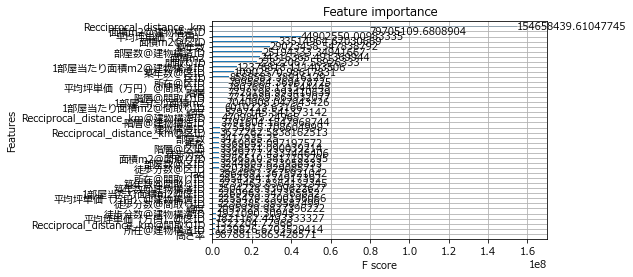

In [391]:
# 特徴量の予測結果への貢献度(Fスコア)を可視化
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
xgb.plot_importance(model, importance_type = "gain")
plt.show()

In [392]:
# # ヒストグラムと散布図の行列を作成
# from pandas.plotting import scatter_matrix
# x = scatter_matrix(train_data_1_no_ID, alpha=1, figsize=(20, 10), diagonal='hist')

[0.67429362 0.25441104]


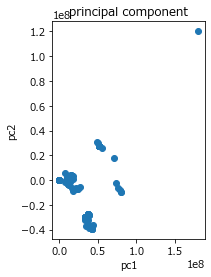

In [393]:
# PCA分析結果を可視化する
transformed = pca.fit_transform(tr_x)

# 主成分をプロットする
plt.subplot(1, 2, 2)
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)
# グラフを表示する
plt.show()

## 6. 予測

In [394]:
tr_x.head()

,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,...,徒歩分数@間取りID,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,Recciprocal_distance_km@建物構造ID,徒歩分数@建物構造ID
0,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,20.010000,0.083333,...,-3.928770,-2.792034,-8.895291,-0.792553,4.303737,-0.474861,-0.882339,-53.491739,-0.042842,-3.906927
1,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,16.500000,0.500000,...,-4.863774,46.072275,-8.215002,4.703136,15.796408,-0.469495,-2.187587,269.474933,0.230314,-4.964583
2,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,22.050000,0.800000,...,-5.839733,-3.236209,-8.553501,17.872314,10.474588,-0.474861,1.176559,85.886766,-0.009203,-5.790585
3,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,17.280000,0.750000,...,-2.992135,33.285864,41.057743,-1.132980,-2.188474,2.932959,-3.015546,-3.071998,-0.040115,-2.947646
5,7.6,50.80,14,6.0,12.0,139.795759,35.732019,3.5,14.514286,0.500000,...,-1.996505,-3.411079,20.836006,1.468078,4.303737,2.932959,-4.450555,-62.314509,-0.043263,-1.976732


In [395]:
test_x.head()

,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,...,徒歩分数@間取りID,築年数@建物構造ID,面積m2@建物構造ID,所在@建物構造ID,階層@建物構造ID,部屋数@建物構造ID,1部屋当たり面積m2@建物構造ID,平均坪単価（万円）@建物構造ID,Recciprocal_distance_km@建物構造ID,徒歩分数@建物構造ID
0,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,...,-14.814047,61.167676,27.877538,16.853456,8.628681,3.070407,-3.503228,36.762779,0.003855,-14.619749
1,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,...,-5.655464,-0.197136,-8.796568,-1.155096,-2.200138,-0.478207,0.067372,17.396033,-0.032094,-5.851948
2,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,...,-9.662749,1.724287,-4.472747,-0.611665,0.157170,-0.463640,11.273106,9.724231,-0.000552,-9.830999
3,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,...,-7.784160,28.949210,-4.983105,-0.402172,-0.389133,-0.416894,7.416685,19.076899,0.062157,-7.935974
5,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,0.50,...,-3.846873,6.981565,-6.056327,-0.402172,-0.389133,-0.416894,4.213185,224.465113,0.161339,-3.983993


In [396]:
# テストデータでの予測
test_x["rad"] = make_radian_row(pca.transform(test_x))
dtest = xgb.DMatrix(test_x)
pred = model.predict(dtest)

In [397]:
pred

array([2540.905 , 5282.4287, 2967.5396, ..., 4435.255 , 3822.3574,
       3829.2314], dtype=float32)

In [398]:
len(pred)

24812

In [399]:
len(test_data_1)

24812

## 7. データ出力

In [400]:
# 予測結果の結合
test_data_1["賃料/面積"] = pred

In [401]:
# 予測結果から賃料を算出し、int型に変換
test_data_1["賃料"] = (test_data_1["面積m2"] * test_data_1["賃料/面積"]).astype(int)

In [402]:
result = test_data_1[["id", "賃料"]]

In [403]:
result

,id,賃料
0,31471,127604
1,31472,110297
2,31473,79915
3,31474,61902
5,31476,66077
...,...,...
31255,62726,101110
31257,62728,102173
31258,62729,100724
31259,62730,174911


In [404]:
len(result)

24812

In [405]:
# 除外していた重複idの賃料を戻す
test_duplicate_rentvalue = pd.read_excel("test_duplicate_rentvalue.xlsx")
result = pd.concat([result, test_duplicate_rentvalue])
result = result.sort_values("id")
len(result)

31262

In [406]:
result

,id,賃料
0,31471,127604
1,31472,110297
2,31473,79915
3,31474,61902
0,31475,90000
...,...,...
31257,62728,102173
31258,62729,100724
31259,62730,174911
6449,62731,280000


In [407]:
result.to_csv("result.csv", header=False, index=False)